In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pylab as plt

In [2]:
# define tamanho padrão das figuras
plt.rc('figure', figsize=(10, 5))
fizsize_with_subplots = (10, 100)
bin_size = 10 

In [3]:
df=pd.read_csv('baseProjeto_entradaModelo.csv', index_col=0)
dfFase1=pd.read_csv('baseProjeto_entradaModelo_fase1.csv', index_col=0)
dfFase1_2_3=pd.read_csv('baseProjeto_entradaModelo_fase1_2_3.csv', index_col=0)

In [4]:
df.head()

,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,...,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,Perda30,PerdaAPI,PerdaPS,PERDA_MAX
1,C1,C1P1,A1,0.08,0.54,1000.0,0.61,1,1,1,...,1,1,0,0,0,0,1,1,0,100.0
2,C1,C1P1,A2,0.05,0.05,1000.0,0.54,1,1,1,...,1,1,0,0,0,0,0,0,0,12.0
3,C1,C1P1,A3,0.05,0.05,1000.0,0.61,1,1,1,...,1,1,0,0,0,0,0,0,0,10.0
4,C1,C1P1,B1,0.13,0.92,1000.0,0.63,1,1,1,...,1,1,0,0,0,0,0,0,0,0.0
5,C1,C1P2,A1,0.16,0.83,300.0,0.42,1,1,1,...,1,1,1,1,1,1,1,1,1,999.0


In [5]:
dfFase1.head()

,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,...,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,Perda30,PerdaAPI,PerdaPS,PERDA_MAX
1,C1,C1P1,A1,0.08,0.54,1000.0,0.61,1,1,1,...,1,1,0,0,0,0,1,1,0,100.0
2,C1,C1P1,A2,0.05,0.05,1000.0,0.54,1,1,1,...,1,1,0,0,0,0,0,0,0,12.0
3,C1,C1P1,A3,0.05,0.05,1000.0,0.61,1,1,1,...,1,1,0,0,0,0,0,0,0,10.0
4,C1,C1P1,B1,0.13,0.92,1000.0,0.63,1,1,1,...,1,1,0,0,0,0,0,0,0,0.0
5,C1,C1P2,A1,0.16,0.83,300.0,0.42,1,1,1,...,1,1,1,1,1,1,1,1,1,999.0


In [6]:
dfFase1_2_3.head()

,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,...,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,Perda30,PerdaAPI,PerdaPS,PERDA_MAX
1,C1,C1P1,A1,0.08,0.54,1000.0,0.61,1,1,1,...,1,1,0,0,0,0,1,1,0,100.0
2,C1,C1P1,A2,0.05,0.05,1000.0,0.54,1,1,1,...,1,1,0,0,0,0,0,0,0,12.0
3,C1,C1P1,A3,0.05,0.05,1000.0,0.61,1,1,1,...,1,1,0,0,0,0,0,0,0,10.0
4,C1,C1P1,B1,0.13,0.92,1000.0,0.63,1,1,1,...,1,1,0,0,0,0,0,0,0,0.0
5,C1,C1P2,A1,0.16,0.83,300.0,0.42,1,1,1,...,1,1,1,1,1,1,1,1,1,999.0


# Database with 89 wells

In [7]:
randomState=100

In [8]:
count_class_0, count_class_1 = df.Perda30.value_counts()
print(count_class_0, count_class_1)

227 66


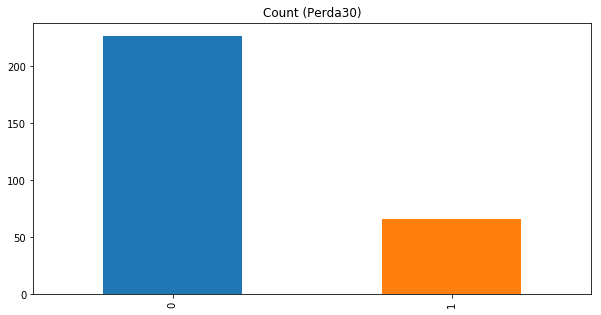

In [9]:
df.Perda30.value_counts().plot(kind='bar', title='Count (Perda30)');

In [10]:
train, test = train_test_split(df, test_size=.30, random_state=randomState, stratify=df['Perda30'])

In [11]:
count_class_0, count_class_1 = train.Perda30.value_counts()
print(count_class_0, count_class_1)

159 46


In [12]:
train_class_0 = train[train['Perda30'] == 0]
train_class_1 = train[train['Perda30'] == 1]

Random over-sampling:
1    159
0    159
Name: Perda30, dtype: int64


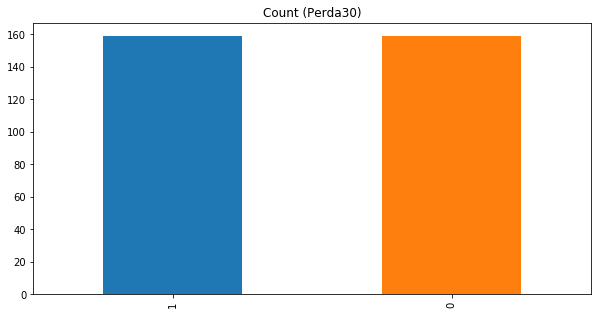

In [13]:
train_class_1_over = train_class_1.sample(count_class_0, replace=True, random_state=randomState)
train_over = pd.concat([train_class_0, train_class_1_over], axis=0)

print('Random over-sampling:')
print(train_over.Perda30.value_counts())

train_over.Perda30.value_counts().plot(kind='bar', title='Count (Perda30)');

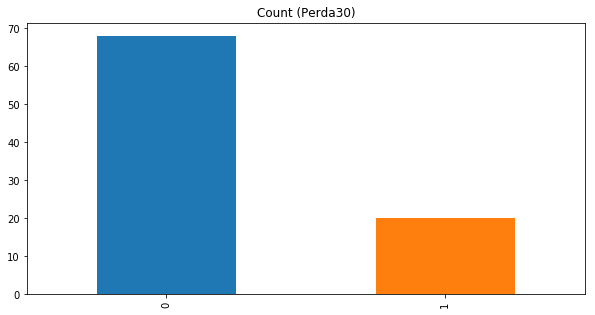

In [14]:
test.Perda30.value_counts().plot(kind='bar', title='Count (Perda30)');

In [15]:
train_over.to_csv('baseProjetoTrainOver.csv', encoding='utf-8')
test.to_csv('baseProjetoTest.csv', encoding='utf-8')

# Fase 1 Database with 38 wells 

In [16]:
count_class_0, count_class_1 = dfFase1.Perda30.value_counts()
print(count_class_0, count_class_1)

85 35


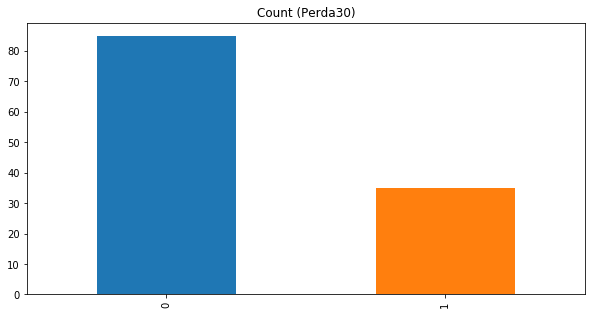

In [17]:
dfFase1.Perda30.value_counts().plot(kind='bar', title='Count (Perda30)');

In [18]:
train, test = train_test_split(dfFase1, test_size=.30, stratify=dfFase1['Perda30'])

In [19]:
count_class_0, count_class_1 = train.Perda30.value_counts()
print(count_class_0, count_class_1)

60 24


In [20]:
train_class_0 = train[train['Perda30'] == 0]
train_class_1 = train[train['Perda30'] == 1]

Random over-sampling:
1    60
0    60
Name: Perda30, dtype: int64


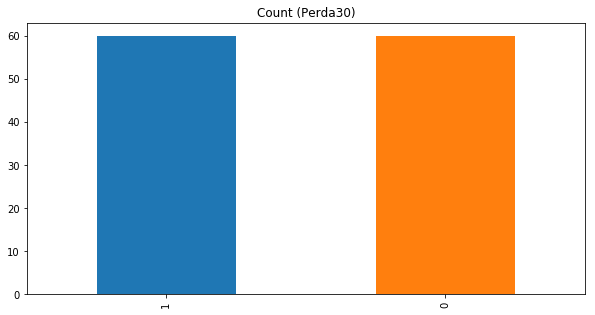

In [21]:
train_class_1_over = train_class_1.sample(count_class_0, replace=True, random_state=randomState)
train_over = pd.concat([train_class_0, train_class_1_over], axis=0)

print('Random over-sampling:')
print(train_over.Perda30.value_counts())

train_over.Perda30.value_counts().plot(kind='bar', title='Count (Perda30)');

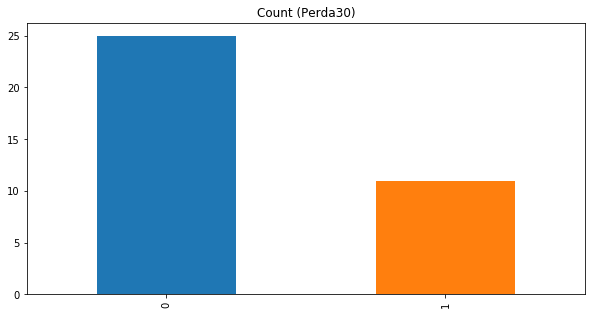

In [22]:
test.Perda30.value_counts().plot(kind='bar', title='Count (Perda30)');

In [23]:
train_over.to_csv('baseProjetoTrainOverFase1.csv', encoding='utf-8')
test.to_csv('baseProjetoTestFase1.csv', encoding='utf-8')

# Fase 1, 2 and 3 Database with 56 wells 

In [24]:
count_class_0, count_class_1 = dfFase1_2_3.Perda30.value_counts()
print(count_class_0, count_class_1)

132 48


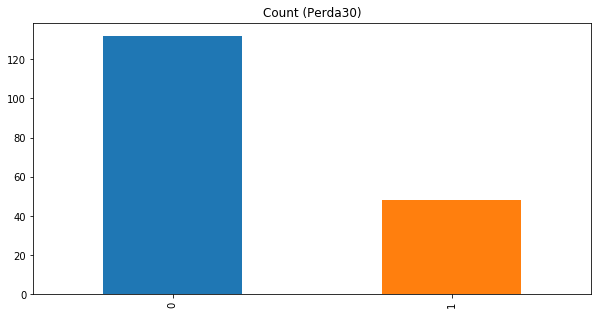

In [25]:
dfFase1_2_3.Perda30.value_counts().plot(kind='bar', title='Count (Perda30)');

In [26]:
train, test = train_test_split(dfFase1, test_size=.30, stratify=dfFase1['Perda30'])

In [27]:
count_class_0, count_class_1 = train.Perda30.value_counts()
print(count_class_0, count_class_1)

59 25


In [28]:
train_class_0 = train[train['Perda30'] == 0]
train_class_1 = train[train['Perda30'] == 1]

Random over-sampling:
1    59
0    59
Name: Perda30, dtype: int64


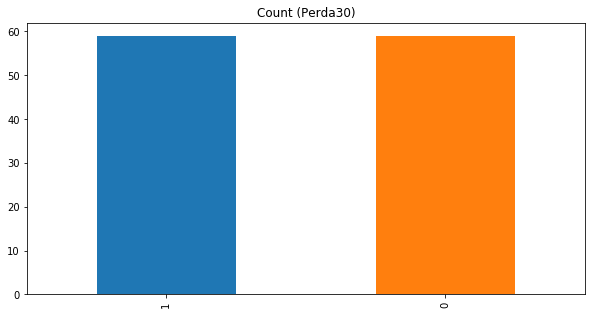

In [29]:
train_class_1_over = train_class_1.sample(count_class_0, replace=True, random_state=randomState)
train_over = pd.concat([train_class_0, train_class_1_over], axis=0)

print('Random over-sampling:')
print(train_over.Perda30.value_counts())

train_over.Perda30.value_counts().plot(kind='bar', title='Count (Perda30)');

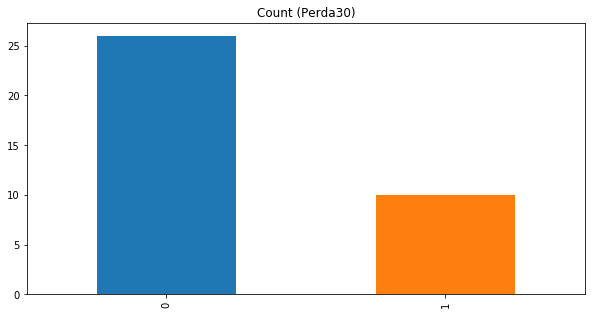

In [30]:
test.Perda30.value_counts().plot(kind='bar', title='Count (Perda30)');

In [31]:
train_over.to_csv('baseProjetoTrainOverFase1_2_3.csv', encoding='utf-8')
test.to_csv('baseProjetoTestFase1_2_3.csv', encoding='utf-8')